In [1]:
# Importando as bibliotecas utilizadas
import yfinance as yf # utilizada para obter dados de ações do yahoo finance
import numpy as np # utilizada para trabalharmos com séries de dados
import pandas as pd # utilizada para trabalharmos com dataframes
import seaborn as sns # utilizada para visualização de dados
import matplotlib.pyplot as plt # utilizada visualização de dados
import matplotlib.ticker as mtick # utilizado para conversão de valores nos eixos de gráficos

In [2]:
# Lendo arquivo com carteira teórica do ibovespa
ibovespa = pd.read_csv('IBOVDia_21-10-22.csv', encoding = 'ISO-8859-1',skiprows=1,sep=';',index_col=False,decimal=',',thousands='.')
ibovespa.set_index('Código',inplace=True)
ibovespa.head()

,Ação,Tipo,Qtde. Teórica,Part. (%)
Código,,,,
RRRP3,3R PETROLEUM,ON NM,2.004539e+08,0.405
ALPA4,ALPARGATAS,PN N1,2.027660e+08,0.192
ABEV3,AMBEV S/A,ON,4.386653e+09,2.987
AMER3,AMERICANAS,ON NM,5.960863e+08,0.382
ARZZ3,AREZZO CO,ON NM,6.035803e+07,0.272


In [3]:
# Checando formato dos dados
ibovespa.dtypes

Ação              object
Tipo              object
Qtde. Teórica    float64
Part. (%)        float64
dtype: object

In [4]:
# Retirando linhas finais que não representam ocorrências
ibovespa.drop(['Quantidade Teórica Total','Redutor'],inplace=True)

In [5]:
# Selecionando códigos da carteira teórica
codigos = list(ibovespa.index.values)
# Convertendo em tickers para consulta em yfinance
tickers = [str(x)+'.SA' for x in codigos]
# Adicionando índice de mercado
tickers.append('^BVSP')
display(tickers)

['RRRP3.SA',
 'ALPA4.SA',
 'ABEV3.SA',
 'AMER3.SA',
 'ARZZ3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BPAN4.SA',
 'BBSE3.SA',
 'BRML3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BRAP4.SA',
 'BBAS3.SA',
 'BRKM5.SA',
 'BRFS3.SA',
 'BPAC11.SA',
 'CRFB3.SA',
 'CCRO3.SA',
 'CMIG4.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPLE6.SA',
 'CSAN3.SA',
 'CPFE3.SA',
 'CMIN3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENGI11.SA',
 'ENEV3.SA',
 'EGIE3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'NTCO3.SA',
 'SOMA3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'KLBN11.SA',
 'RENT3.SA',
 'LWSA3.SA',
 'LREN3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'CASH3.SA',
 'BEEF3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PRIO3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIZ4.SA',
 'RDOR3.SA',
 'RAIL3.SA',
 'SBSP3.SA',
 'SANB11.SA',
 'SMTO3

In [6]:
# Fazendo download do histórico de preço da lista de tickers
precos = yf.download(tickers,'2020-10-20')['Adj Close']
precos.head()

[*********************100%***********************]  93 of 93 completed


,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-20,12.486212,41.903378,88.423920,53.231499,NaN,26.280001,17.512449,27.928856,14.831891,16.364435,...,28.085262,17.996342,10.092507,48.127052,18.374952,19.920000,37.534626,40.615196,26.034506,100540.0
2020-10-21,12.476879,42.160519,87.394600,52.342693,NaN,26.120001,17.352144,28.138256,14.968171,16.531881,...,28.331020,17.659435,10.285245,48.913086,18.269751,20.129999,37.473808,38.111694,25.760973,100552.0
2020-10-22,12.663520,42.140736,85.384964,50.787292,NaN,26.740000,16.958950,29.359766,15.475440,17.293022,...,28.517796,17.462908,10.276484,49.107655,18.217154,20.170000,38.055939,39.915188,25.848894,101918.0
2020-10-23,12.962143,41.913273,84.992844,58.931423,NaN,27.100000,16.574825,29.255054,15.445160,17.216909,...,27.967297,17.322533,10.258962,49.380043,18.296055,20.290001,38.594627,39.701298,25.448362,101260.0
2020-10-26,13.251435,42.022060,85.149696,60.052078,NaN,26.139999,16.629267,29.228888,15.619294,17.430023,...,27.790352,16.798456,10.188876,48.640701,18.015520,19.610001,38.516449,40.226303,24.881758,101017.0


In [7]:
# Transformando histórico de preços em histórico de retornos diários
retornos = precos.pct_change()
retornos.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-21,-0.000747,0.006137,-0.011641,-0.016697,NaN,-0.006088,-0.009154,0.007498,0.009188,0.010232,...,0.008750,-0.018721,0.019097,0.016332,-0.005725,0.010542,-0.001620,-0.061640,-0.010507,0.000119
2020-10-22,0.014959,-0.000469,-0.022995,-0.029716,NaN,0.023737,-0.022660,0.043411,0.033890,0.046041,...,0.006593,-0.011129,-0.000852,0.003978,-0.002879,0.001987,0.015534,0.047321,0.003413,0.013585
2020-10-23,0.023581,-0.005398,-0.004592,0.160358,NaN,0.013463,-0.022650,-0.003566,-0.001957,-0.004401,...,-0.019304,-0.008038,-0.001705,0.005547,0.004331,0.005949,0.014155,-0.005359,-0.015495,-0.006456
2020-10-26,0.022318,0.002596,0.001845,0.019016,NaN,-0.035424,0.003285,-0.000894,0.011274,0.012378,...,-0.006327,-0.030254,-0.006832,-0.014972,-0.015333,-0.033514,-0.002026,0.013224,-0.022265,-0.002400


In [8]:
# Removendo o primeiro dia de histórico, que terá retorno nulo
retornos = retornos.drop(retornos.index[0])
retornos.head()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-21,-0.000747,0.006137,-0.011641,-0.016697,NaN,-0.006088,-0.009154,0.007498,0.009188,0.010232,...,0.008750,-0.018721,0.019097,0.016332,-0.005725,0.010542,-0.001620,-0.061640,-0.010507,0.000119
2020-10-22,0.014959,-0.000469,-0.022995,-0.029716,NaN,0.023737,-0.022660,0.043411,0.033890,0.046041,...,0.006593,-0.011129,-0.000852,0.003978,-0.002879,0.001987,0.015534,0.047321,0.003413,0.013585
2020-10-23,0.023581,-0.005398,-0.004592,0.160358,NaN,0.013463,-0.022650,-0.003566,-0.001957,-0.004401,...,-0.019304,-0.008038,-0.001705,0.005547,0.004331,0.005949,0.014155,-0.005359,-0.015495,-0.006456
2020-10-26,0.022318,0.002596,0.001845,0.019016,NaN,-0.035424,0.003285,-0.000894,0.011274,0.012378,...,-0.006327,-0.030254,-0.006832,-0.014972,-0.015333,-0.033514,-0.002026,0.013224,-0.022265,-0.002400
2020-10-27,-0.033803,0.008002,-0.013931,-0.014640,NaN,-0.009946,-0.040560,-0.021493,-0.025691,-0.027948,...,0.008136,-0.012256,0.010318,0.000480,-0.015572,-0.037226,-0.019175,0.005921,-0.020809,-0.013968


In [9]:
# Estatísticas sumárias do histórico de retornos diários de cada ação do ibovespa
retornos.describe()

,ABEV3.SA,ALPA4.SA,AMER3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA,^BVSP
count,498.000000,498.000000,498.000000,498.000000,413.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.000554,-0.001032,-0.002765,0.001545,0.000858,-0.000199,-0.000152,0.000985,0.000400,0.000576,...,0.000505,-0.000256,-0.000123,0.001058,0.000192,-0.003052,0.000202,-0.000050,-0.000934,0.000377
std,0.018605,0.028728,0.042059,0.023157,0.020392,0.038701,0.024027,0.020261,0.018868,0.019893,...,0.025662,0.027067,0.030385,0.022904,0.022303,0.039100,0.013616,0.023029,0.034078,0.013200
min,-0.057010,-0.135389,-0.130408,-0.078099,-0.092199,-0.180027,-0.083799,-0.116457,-0.087970,-0.085827,...,-0.111249,-0.123343,-0.077447,-0.075913,-0.072179,-0.124823,-0.046767,-0.077278,-0.117610,-0.051201
25%,-0.010763,-0.017254,-0.027221,-0.011066,-0.011529,-0.020541,-0.015927,-0.009245,-0.009991,-0.010672,...,-0.014757,-0.015848,-0.019148,-0.014610,-0.014855,-0.030353,-0.007839,-0.013318,-0.021630,-0.007417
50%,0.000000,-0.001736,-0.006050,-0.000388,0.000450,-0.002837,-0.001454,0.000298,0.000195,-0.000468,...,-0.000296,-0.002282,-0.001267,0.000228,-0.000272,-0.004841,-0.000201,-0.001807,-0.002715,0.000659
75%,0.010387,0.013857,0.019320,0.013778,0.012916,0.018629,0.014344,0.012608,0.010564,0.011731,...,0.016131,0.014872,0.017001,0.014874,0.012935,0.017324,0.007313,0.011796,0.016558,0.008669
max,0.097241,0.166537,0.224866,0.160358,0.089431,0.184342,0.080750,0.076324,0.091053,0.094988,...,0.077682,0.150932,0.097175,0.079866,0.095694,0.144654,0.068118,0.081710,0.141002,0.055409


In [10]:
# Separando o índice de mercado das demais ações
indice_mercado = retornos['^BVSP']
retornos = retornos.drop('^BVSP', axis=1)

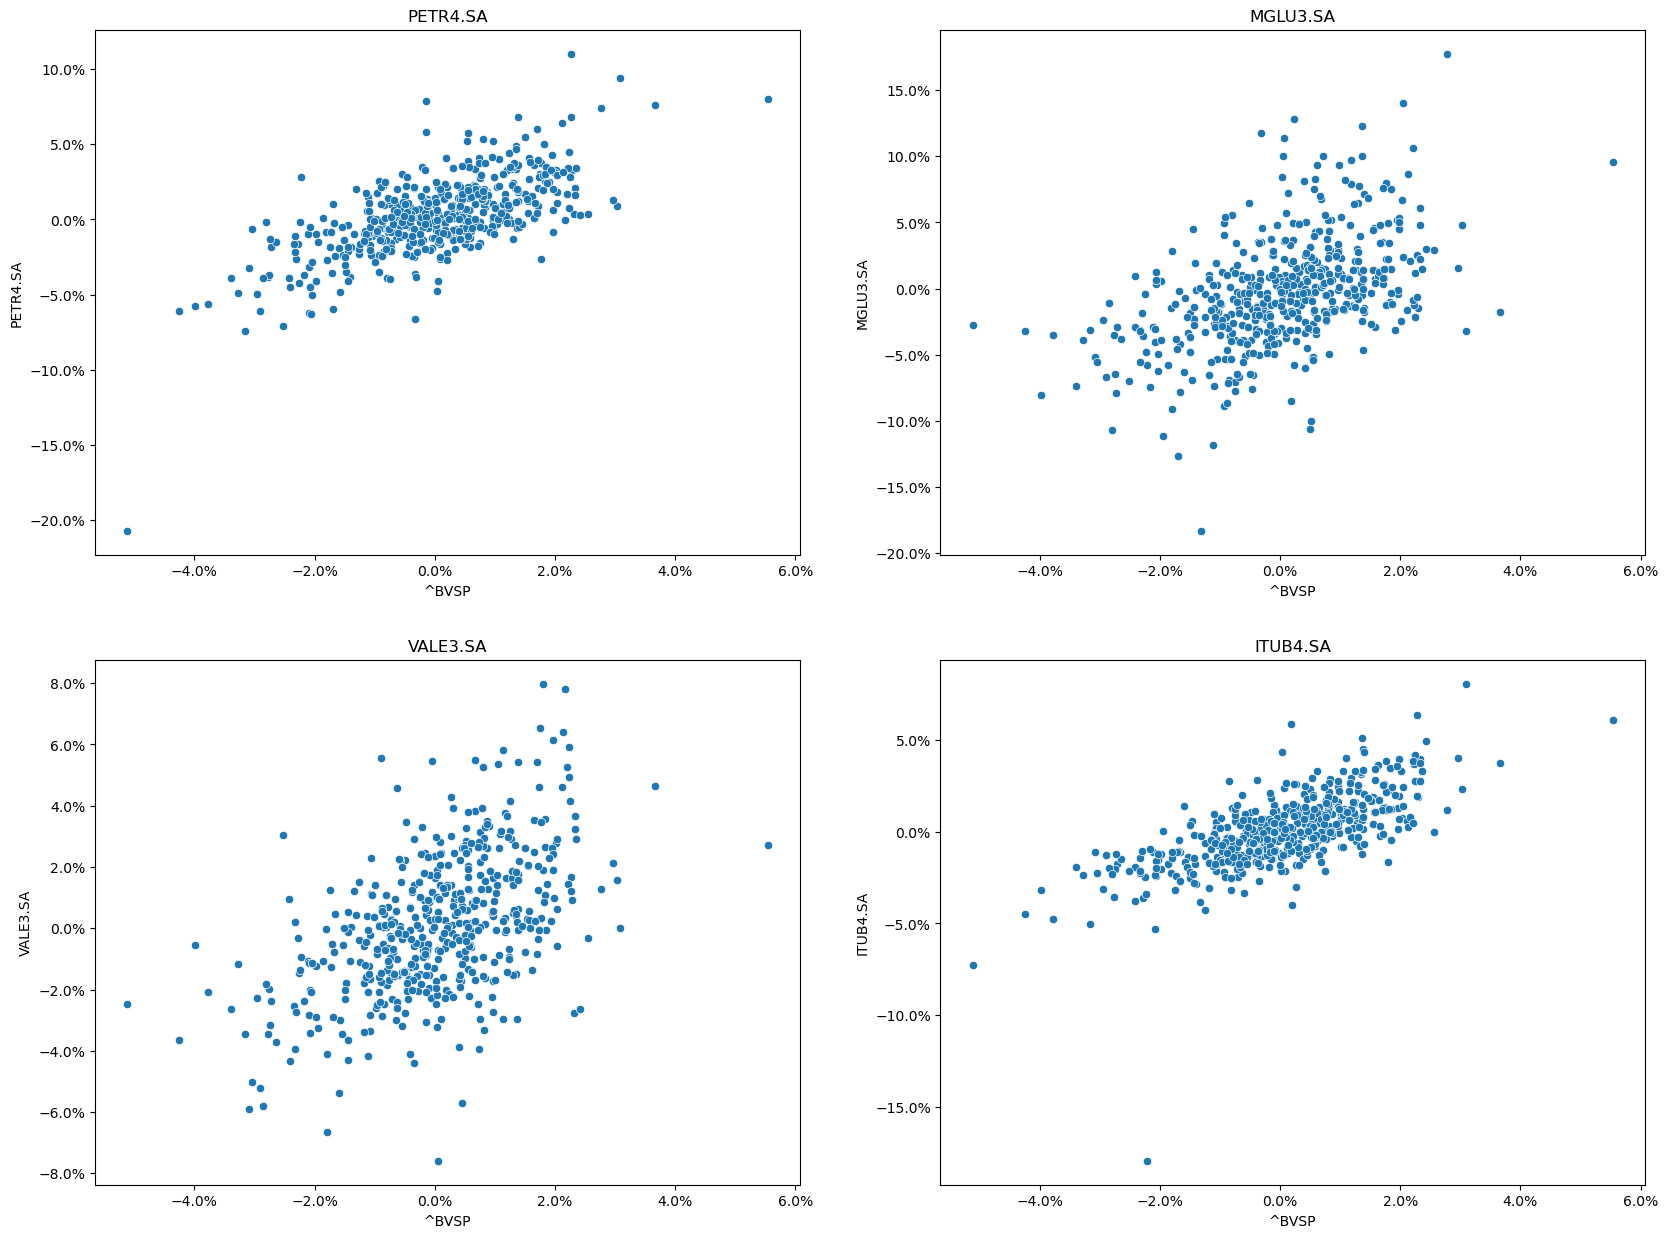

In [11]:
# Criando visualização da distribuição entre retornos das ações e do mercado
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ticker, ax in zip(['PETR4.SA','MGLU3.SA','VALE3.SA','ITUB4.SA'],axes.ravel()):
    sns.scatterplot(ax=ax,x=indice_mercado,y=retornos[ticker])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.set_title(ticker)

In [12]:
# Definindo função para calcular regressão linear
def regressao(retornos_mercado,retornos_acao):
    x_values = np.array(retornos_mercado)
    y_values = np.array(retornos_acao)

    x_avg = np.mean(x_values)
    y_avg = np.mean(y_values)


    x_diff = x_values - x_avg
    y_diff = y_values - y_avg
    composite = x_diff * y_diff

    x_diff_sqr = x_diff**2
    y_diff_sqr = y_diff**2

    slope = np.sum(composite)/np.sum(x_diff_sqr)
    y_intercept = y_avg - slope*x_avg
    
    y_predictions = slope * x_values + y_intercept
    residuals = y_values - y_predictions
    residuals_squared = residuals**2
    
    r_squared = 1 - np.sum(residuals_squared)/np.sum(y_diff_sqr)
    
    return (slope,y_intercept,r_squared)
    

In [13]:
# Inicializando dataframe para receber dados das regressões
regressoes = pd.DataFrame(columns=['Beta','Intercepto','R_Quadrado'])

# Calculando a regressão para as ações da carteira teórica do ibovespa
for ticker in retornos.columns.values:
    resultado = regressao(indice_mercado,retornos[ticker])
    regressoes.loc[ticker] = [resultado[0],resultado[1],resultado[2]]

In [14]:
# Estatísticas sumárias dos componentes das regressões
regressoes.describe()

,Beta,Intercepto,R_Quadrado
count,85.000000,85.000000,85.000000
mean,0.999044,-0.000074,0.273775
std,0.348298,0.001308,0.120201
min,0.337121,-0.003867,0.046153
25%,0.763034,-0.000769,0.191272
50%,1.003994,0.000080,0.264443
75%,1.212332,0.000676,0.366945
max,1.887308,0.003297,0.595161


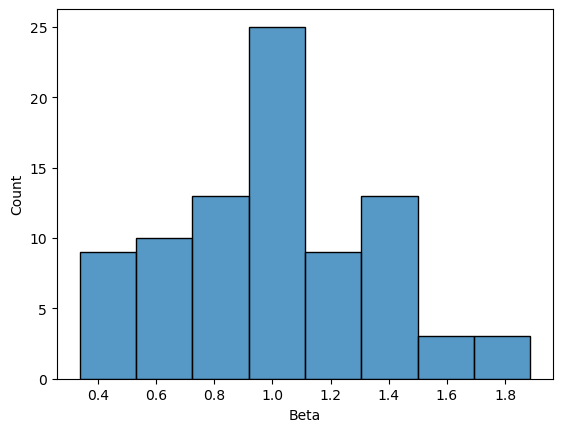

In [15]:
# Visualizando a distribuição dos Betas
plt.clf()
sns.histplot(regressoes['Beta'])
plt.show()

In [16]:
# Visualizando maiores e menores betas
display(regressoes['Beta'].nlargest(5))
display(regressoes['Beta'].nsmallest(5))

GOLL4.SA    1.887308
AZUL4.SA    1.827801
CVCB3.SA    1.795409
VIIA3.SA    1.603576
BPAN4.SA    1.568818
Name: Beta, dtype: float64

VIVT3.SA     0.337121
SUZB3.SA     0.347169
TAEE11.SA    0.363729
JBSS3.SA     0.386100
KLBN11.SA    0.390525
Name: Beta, dtype: float64

<Figure size 640x480 with 0 Axes>

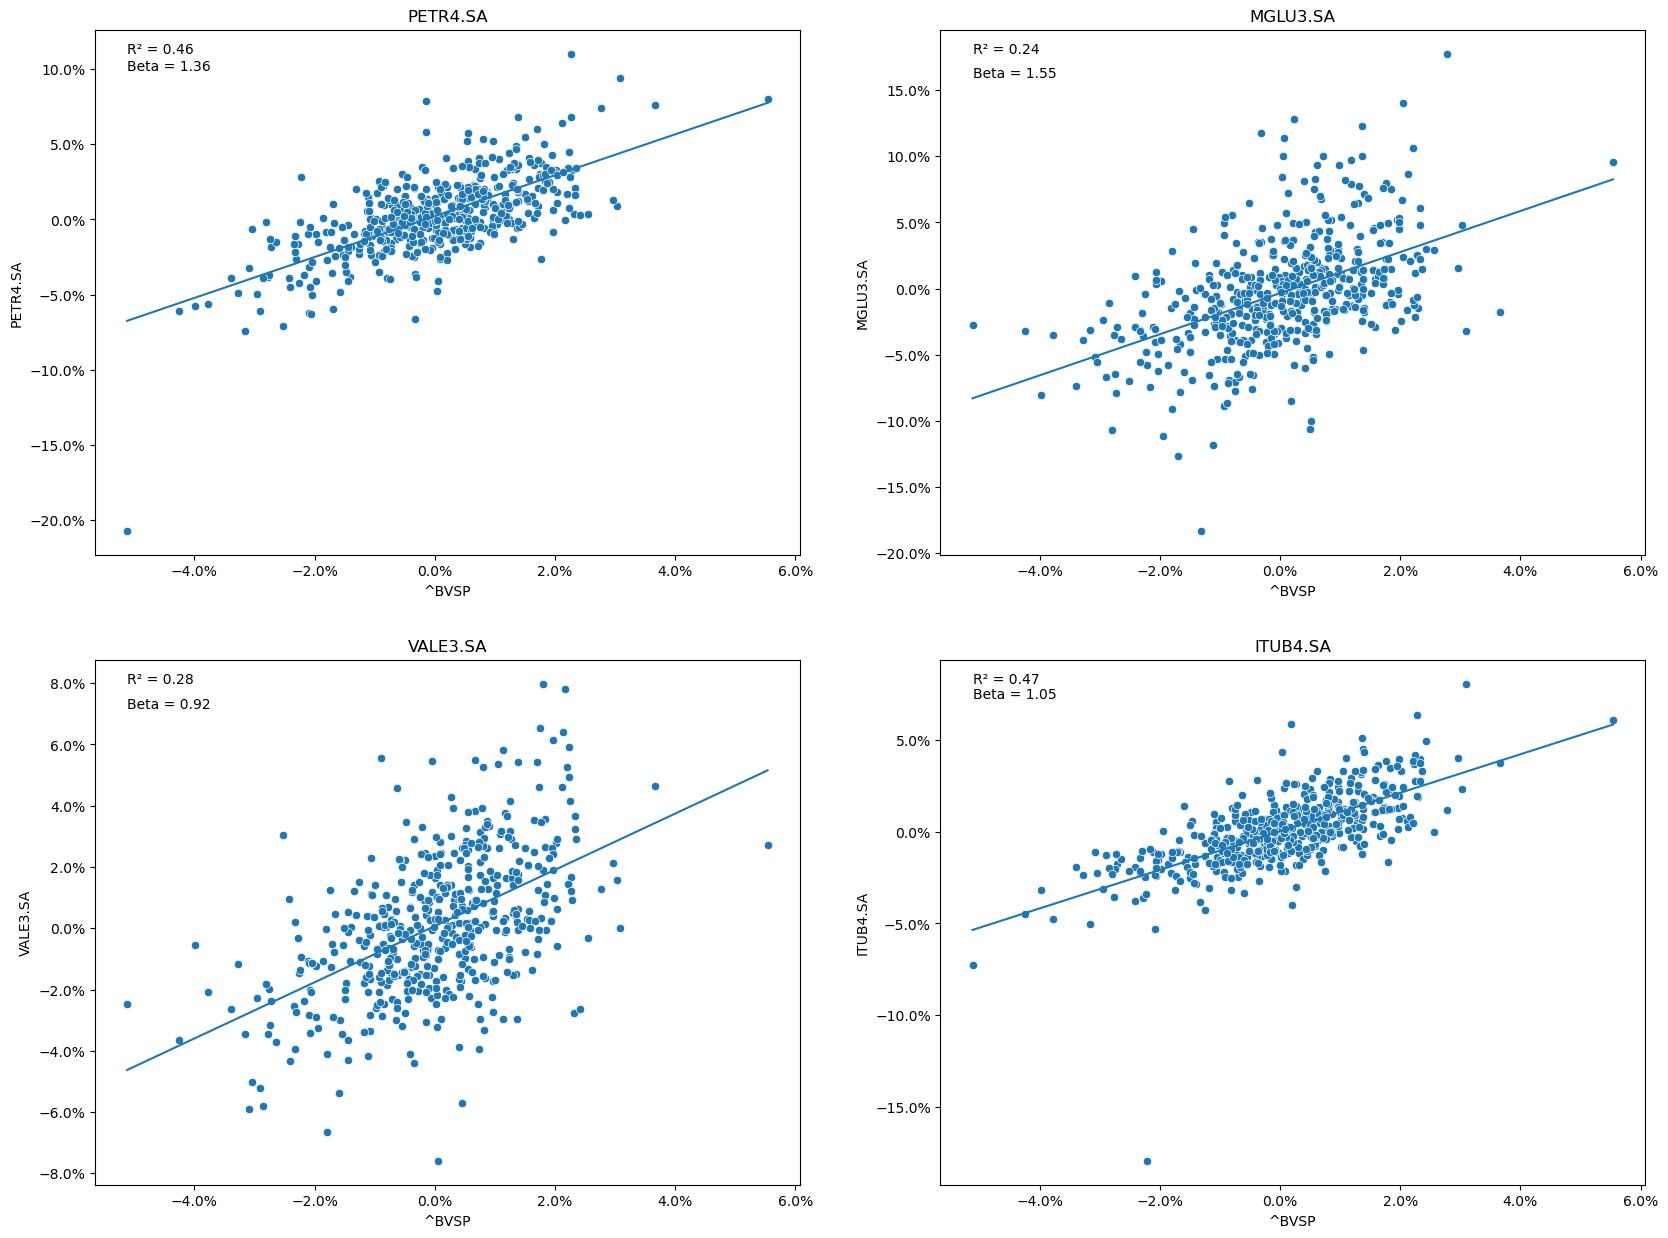

In [19]:
# Criando visualização da distribuição entre retornos das ações e do mercado + regressão 
plt.clf()
fig, axes = plt.subplots(2,2,figsize=(20,15))

for ticker, ax in zip(['PETR4.SA','MGLU3.SA','VALE3.SA','ITUB4.SA'],axes.ravel()):
    sns.scatterplot(ax=ax,x=indice_mercado,y=retornos[ticker])
    regression_equation = regressoes['Beta'].loc[ticker]*indice_mercado + regressoes['Intercepto'].loc[ticker]
    sns.lineplot(ax=ax, x=indice_mercado, y=regression_equation)
    ax.set_title(ticker)
    ax.annotate('R² = '+str(round(regressoes['R_Quadrado'].loc[ticker],2)),(indice_mercado.min(),retornos[ticker].max()))
    ax.annotate('Beta = '+str(round(regressoes['Beta'].loc[ticker],2)),(indice_mercado.min(),retornos[ticker].max()*0.9))    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
    ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=1,symbol='%'))
                 
plt.show()

In [18]:
# Visualizando maiores e menores R²
display(regressoes['R_Quadrado'].nlargest(5))
display(regressoes['R_Quadrado'].nsmallest(5))

ITSA4.SA    0.595161
BBDC3.SA    0.529215
BBAS3.SA    0.501151
BBDC4.SA    0.486841
ITUB4.SA    0.474841
Name: R_Quadrado, dtype: float64

PCAR3.SA    0.046153
SUZB3.SA    0.046765
MRFG3.SA    0.050278
SLCE3.SA    0.072158
JBSS3.SA    0.075205
Name: R_Quadrado, dtype: float64